<a href="https://colab.research.google.com/github/Carlos1729/DGL/blob/main/Homogeneous_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# If you have installed dgl-cuXX package, please uninstall it first.
!pip install  dgl -f https://data.dgl.ai/wheels/cu116/repo.html

Looking in links: https://data.dgl.ai/wheels/cu116/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 MB 9.6 MB/s eta 0:00:00


In [2]:
!pip install  dglgo -f https://data.dgl.ai/wheels-test/repo.html

Looking in links: https://data.dgl.ai/wheels-test/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 42.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=e4dd055a556c0afe160cb97975349fc038f68d92b4bbea4e5da316b5b51296b1
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03

In [3]:
import dgl

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [4]:
import torch

###Homogeneous Graphs using DGL

In [5]:
src_node_ids =  torch.tensor([0, 0, 0, 1, 1, 2, 2, 3])
dst_node_ids = torch.tensor([1, 2, 4, 2, 3, 3, 4, 4])
graph = dgl.graph((src_node_ids, dst_node_ids))
print(graph)

Graph(num_nodes=5, num_edges=8,
      ndata_schemes={}
      edata_schemes={})


In [6]:
graph.nodes()

tensor([0, 1, 2, 3, 4])

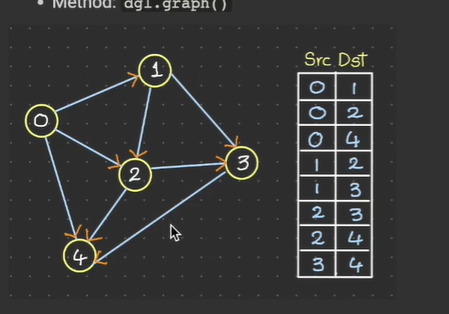

In [7]:
graph.edges()

(tensor([0, 0, 0, 1, 1, 2, 2, 3]), tensor([1, 2, 4, 2, 3, 3, 4, 4]))

In [8]:
graph.edges(form='all')   # SRC-DST-EDGEIDS

(tensor([0, 0, 0, 1, 1, 2, 2, 3]),
 tensor([1, 2, 4, 2, 3, 3, 4, 4]),
 tensor([0, 1, 2, 3, 4, 5, 6, 7]))

###Undirected Graphs

In [9]:
src_node_ids =  torch.tensor([0, 0, 0, 1, 1, 2, 2, 3, 1, 2, 4, 2, 3, 3, 4, 4]) #adding reverse edges
dst_node_ids =  torch.tensor([1, 2, 4, 2, 3, 3, 4, 4, 0, 0, 0, 1, 1, 2, 2, 3]) #adding reverse edges
undirected_graph = dgl.graph((src_node_ids, dst_node_ids))
print(undirected_graph)

Graph(num_nodes=5, num_edges=16,
      ndata_schemes={}
      edata_schemes={})


In [10]:
#Direct function
undirected_graph_new = dgl.to_bidirected(graph)
print(undirected_graph_new)

Graph(num_nodes=5, num_edges=16,
      ndata_schemes={}
      edata_schemes={})


In [11]:
graph.idtype

torch.int64

In [12]:
2**32

4294967296

In [13]:
graph_32 = graph.int()
graph_32.idtype

torch.int32

In [14]:
graph_64 = graph.long()
graph_64.idtype

torch.int64

In [15]:
import numpy

In [16]:
src_node_ids_numpy =  numpy.array([0, 0, 0, 1, 1, 2, 2, 3])
dst_node_ids_numpy =  numpy.array([1, 2, 4, 2, 3, 3, 4, 4])
graph_numpy = dgl.graph((src_node_ids_numpy,dst_node_ids_numpy))
graph_numpy

Graph(num_nodes=5, num_edges=8,
      ndata_schemes={}
      edata_schemes={})

In [17]:
graph_numpy.nodes()

tensor([0, 1, 2, 3, 4])

In [18]:
graph_numpy.edges()

(tensor([0, 0, 0, 1, 1, 2, 2, 3]), tensor([1, 2, 4, 2, 3, 3, 4, 4]))

Handling the isolated nodes in DGL graphs

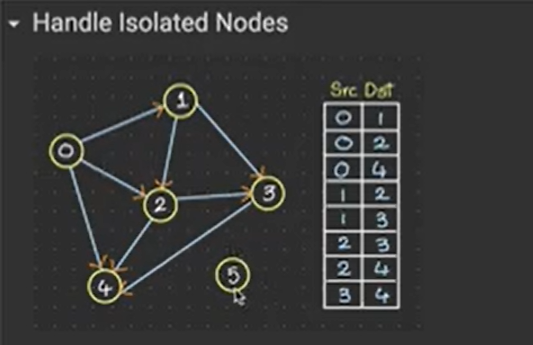

In [19]:
src_node_ids =  torch.tensor([0, 0, 0, 1, 1, 2, 2, 3])
dst_node_ids = torch.tensor([1, 2, 4, 2, 3, 3, 4, 4])
graph = dgl.graph((src_node_ids, dst_node_ids),num_nodes=6)
print(graph)

Graph(num_nodes=6, num_edges=8,
      ndata_schemes={}
      edata_schemes={})


In [20]:
graph.nodes()

tensor([0, 1, 2, 3, 4, 5])

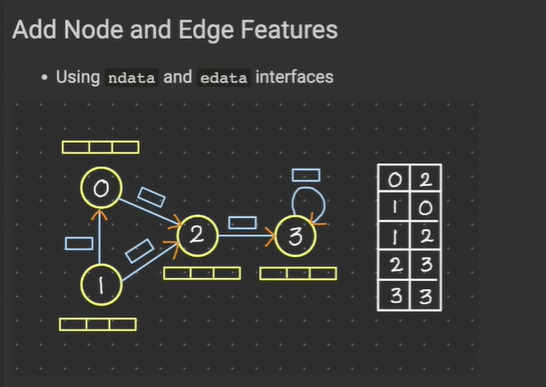

In [21]:
src_node_ids =  torch.tensor([0, 1, 1, 2, 3])
dst_node_ids =  torch.tensor([2, 0, 2, 3, 3])
graph = dgl.graph((src_node_ids, dst_node_ids))
graph

Graph(num_nodes=4, num_edges=5,
      ndata_schemes={}
      edata_schemes={})

In [22]:
graph.ndata

{}

Add Node Features

In [23]:
graph.ndata['node_vectors'] =  torch.tensor([
                                            [1, 2, 3],
                                            [2, 4, 5],
                                            [3, 5, 6],
                                            [7, 8, 9]])

In [24]:
graph

Graph(num_nodes=4, num_edges=5,
      ndata_schemes={'node_vectors': Scheme(shape=(3,), dtype=torch.int64)}
      edata_schemes={})

In [25]:
graph.ndata['node_vectors'].shape

torch.Size([4, 3])

Add Edge Features

In [26]:
graph.edges(form='all')

(tensor([0, 1, 1, 2, 3]), tensor([2, 0, 2, 3, 3]), tensor([0, 1, 2, 3, 4]))

In [27]:
graph.edata

{}

In [28]:
graph.edata['edge_weights'] =  torch.tensor([100,200,300,400,500])

In [29]:
graph

Graph(num_nodes=4, num_edges=5,
      ndata_schemes={'node_vectors': Scheme(shape=(3,), dtype=torch.int64)}
      edata_schemes={'edge_weights': Scheme(shape=(), dtype=torch.int64)})

In [30]:
graph.edata['edge_weights']

tensor([100, 200, 300, 400, 500])

In [32]:
data_dict = {
    ('user', 'watches', 'movie'): (torch.tensor([0, 0, 1, 2]), torch.tensor([0, 1, 0, 1])),
    ('director', 'directs', 'movie'): (torch.tensor([0, 1]), torch.tensor([1, 0]))
}

# .1(src type, edge_type, dst_type): (src_node_id_tensor, dst_node_id_tensor)}

In [33]:
hetero_graph  = dgl.heterograph(data_dict)
hetero_graph

Graph(num_nodes={'director': 2, 'movie': 2, 'user': 3},
      num_edges={('director', 'directs', 'movie'): 2, ('user', 'watches', 'movie'): 4},
      metagraph=[('director', 'movie', 'directs'), ('user', 'movie', 'watches')])

In [34]:
biderect_hetero_graph  = dgl.to_bidirected(hetero_graph)
biderect_hetero_graph

AssertionError: ignored

In [36]:
hetero_graph.nodes() #we have multiple node types

DGLError: ignored

In [37]:
hetero_graph.ntypes

['director', 'movie', 'user']

In [38]:
hetero_graph.nodes(ntype = 'user')

tensor([0, 1, 2])

In [39]:
hetero_graph.etypes

['directs', 'watches']

In [42]:
hetero_graph.edges(etype = 'watches')

(tensor([0, 0, 1, 2]), tensor([0, 1, 0, 1]))

In [43]:
bidir_data_dict = {
    ('user', 'watches', 'movie'): (torch.tensor([0, 0, 1, 2]), torch.tensor([0, 1, 0, 1])),
    ('movie', 'watched_by', 'user'): (torch.tensor([0, 1, 0, 1]), torch.tensor([0, 0, 1, 2])),
    ('director', 'directs', 'movie'): (torch.tensor([0, 1]), torch.tensor([1, 0])),
    ('movie', 'directed_by', 'director'): (torch.tensor([1, 0]), torch.tensor([0, 1]))
}

bidir_data_dict

# .1(src type, edge_type, dst_type): (src_node_id_tensor, dst_node_id_tensor)}

{('user', 'watches', 'movie'): (tensor([0, 0, 1, 2]), tensor([0, 1, 0, 1])),
 ('movie', 'watched_by', 'user'): (tensor([0, 1, 0, 1]), tensor([0, 0, 1, 2])),
 ('director', 'directs', 'movie'): (tensor([0, 1]), tensor([1, 0])),
 ('movie', 'directed_by', 'director'): (tensor([1, 0]), tensor([0, 1]))}

In [44]:
bi_hetero_graph  = dgl.heterograph(bidir_data_dict)
bi_hetero_graph

Graph(num_nodes={'director': 2, 'movie': 2, 'user': 3},
      num_edges={('director', 'directs', 'movie'): 2, ('movie', 'directed_by', 'director'): 2, ('movie', 'watched_by', 'user'): 4, ('user', 'watches', 'movie'): 4},
      metagraph=[('director', 'movie', 'directs'), ('movie', 'director', 'directed_by'), ('movie', 'user', 'watched_by'), ('user', 'movie', 'watches')])

In [46]:
for et in bi_hetero_graph.etypes:
  print(bi_hetero_graph.edges(etype  = et))

(tensor([0, 1]), tensor([1, 0]))
(tensor([1, 0]), tensor([0, 1]))
(tensor([0, 1, 0, 1]), tensor([0, 0, 1, 2]))
(tensor([0, 0, 1, 2]), tensor([0, 1, 0, 1]))


In [47]:
for et in bi_hetero_graph.etypes:
  print(bi_hetero_graph.num_edges(etype  = et))

2
2
4
4
